# Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

***

**Данный семинар содержит оцениваемые упражнения и вопросы.**

Система оценивания: доля правильно решенных упражений. Максимальный балл, соответственно, 1.

В упражнениях оценивается два аспекта:
1. Код проходит assert'ы (если они есть)
2. Код корректен с точки зрения логики

Вопросы также оцениваются. Ответ на них нужно записывать в соответствующие markdown-ячейки.

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [142]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [143]:
AERIAL_IMG_PATH = "data/aerial_image.jpg"
SUNFLOWER_IMG_PATH = "data/sunflower.jpg"

if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

## 1. Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [144]:
img = cv2.imread(SUNFLOWER_IMG_PATH)

In [145]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

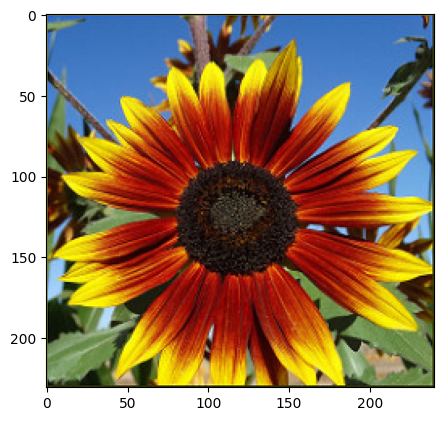

In [146]:
plt.figure(figsize=[5, 5])
plt.imshow(img_rgb)

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [147]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

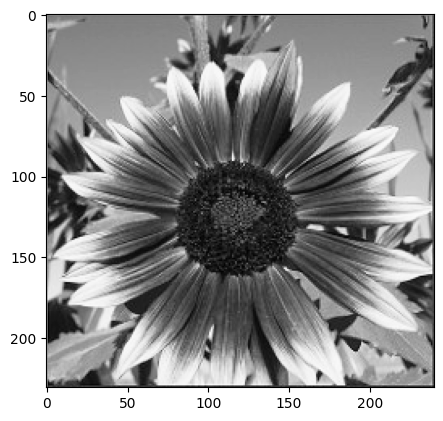

In [148]:
plt.figure(figsize=[5, 5])
plt.imshow(img_gray, cmap='Greys_r')

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [149]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

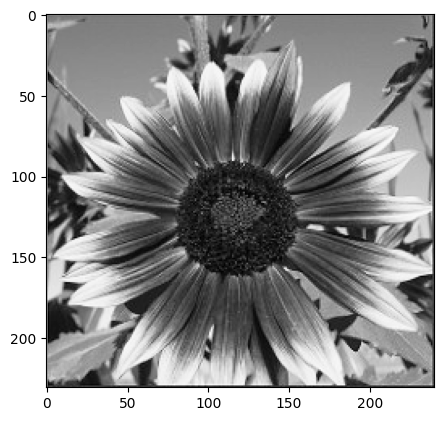

In [150]:
plt.figure(figsize=[5, 5])
plt.imshow(img_gray, cmap='Greys_r')

серое изображение - двумерный массив:

In [151]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (231, 240)
img_gray.dtype =  uint8


## Упражнение 1: RGB $\to$ gray

**Это и все последующие упражения - оцениваемые, для самостоятельной работы.**

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [152]:
def convert_rgb_to_grayscale(img_rgb):
  r = img_rgb[:,:,0]
  g = img_rgb[:,:,1]
  b = img_rgb[:,:,2]
  return np.round(r * 0.29901 + g * 0.58701 + b * 0.1140)

In [153]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

## Вопрос 1

**Этот и все последующие вопросы - оцениваемые, для самостоятельной работы.**

Почему бы не использовать при преобразовании в серое просто среднее арифметическое?

**Ответ:** человеческий глаз воспринимает цвета неравнозначно. При срднем арифметическом эта пропорция нарушается

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

## RGB $\to$ HSV

In [154]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

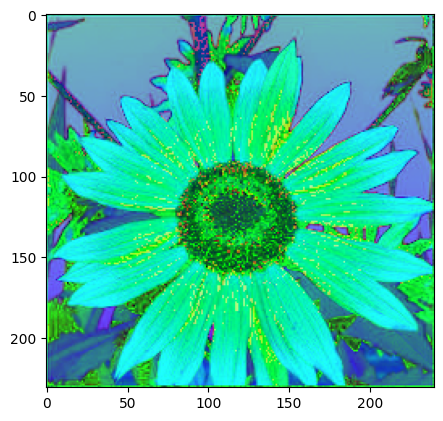

In [155]:
plt.figure(figsize=[5, 5])
plt.imshow(img_hsv)

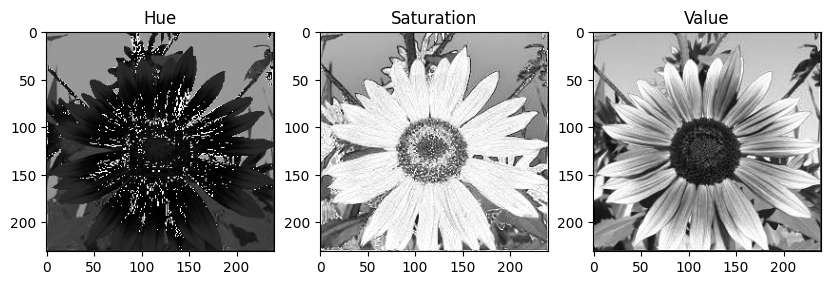

In [156]:
# Split the image into color channels
h, s, v = cv2.split(img_hsv)

plt.figure(figsize=[10, 30])
plt.subplot(131)
plt.imshow(h, cmap="gray")
plt.title('Hue')

plt.subplot(132)
plt.imshow(s, cmap="gray")
plt.title('Saturation')

plt.subplot(133)
plt.imshow(v, cmap="gray")
plt.title('Value')

# Display the plot
plt.show()


## Упражнение 2

Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

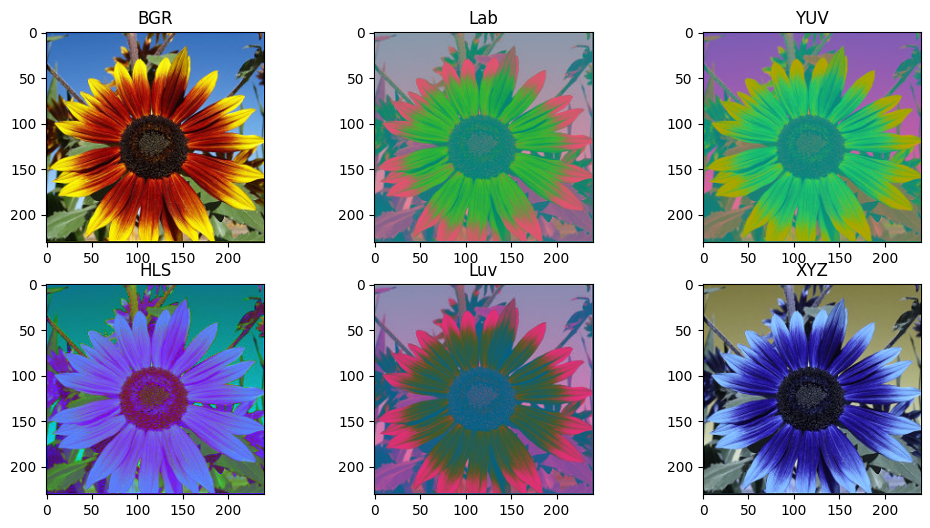

In [157]:
# Конвертация из BGR в другое цветовое пространство
lab_image = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2Lab)
yuv_image = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2YUV)
hls_image = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HLS)
luv_image = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2Luv)
xyz_image = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2XYZ)

# Отображение изображений
plt.figure(figsize=(12, 6))

plt.subplot(231), plt.imshow(img_rgb), plt.title('BGR')
plt.subplot(232), plt.imshow(lab_image), plt.title('Lab')
plt.subplot(233), plt.imshow(yuv_image), plt.title('YUV')
plt.subplot(234), plt.imshow(hls_image), plt.title('HLS')
plt.subplot(235), plt.imshow(luv_image), plt.title('Luv')
plt.subplot(236), plt.imshow(xyz_image), plt.title('XYZ')

plt.show()

## Вопрос 2

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:** Сегментация, получение каких-либо признаков изображения (засветка, нарушение баланса белого и т.д), сжатие изображений

## Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v]
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визализировать гистограмму:

In [158]:
def visualize_hist(hist):
    plt.figure(figsize=[20, 5])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [159]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [160]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

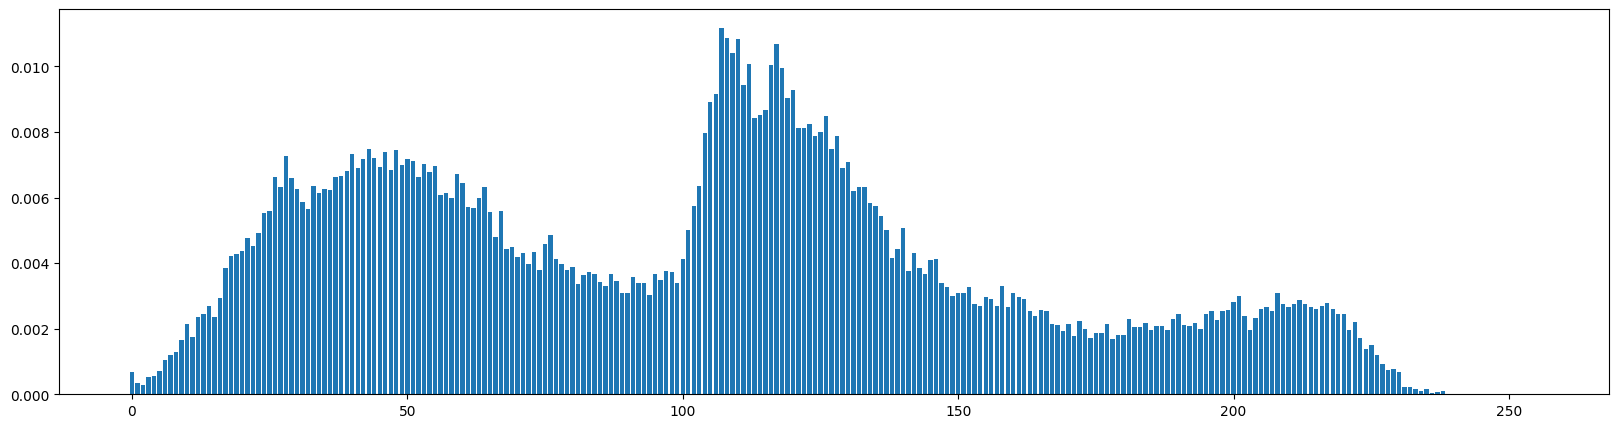

In [161]:
visualize_hist(hist_cv)

## Упражнение 3: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения. Используйте ее для визуализации трех каналов RGB изображения.

In [162]:
from collections import Counter
def compute_hist(img):
  count = Counter(img.flatten())
  return np.array([count[i] for i in range(256)])

In [163]:
hist_gray = compute_hist(img_gray)

hist_r = compute_hist(img_rgb[:, :, 0])
hist_g = compute_hist(img_rgb[:, :, 1])
hist_b = compute_hist(img_rgb[:, :, 2])

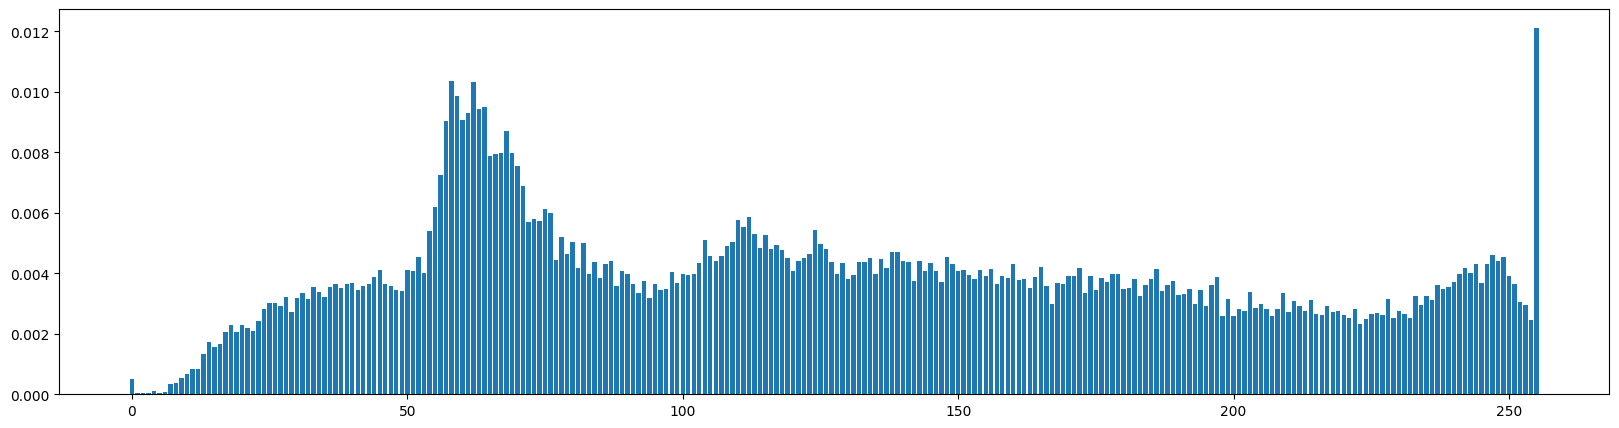

In [164]:
visualize_hist(hist_r)

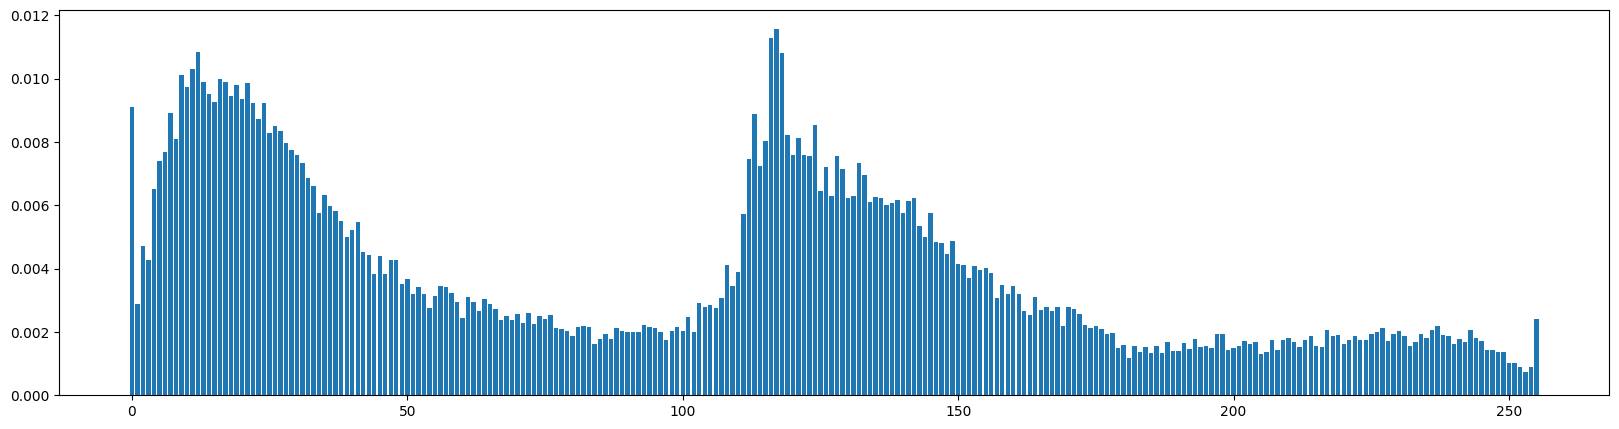

In [165]:
visualize_hist(hist_g)

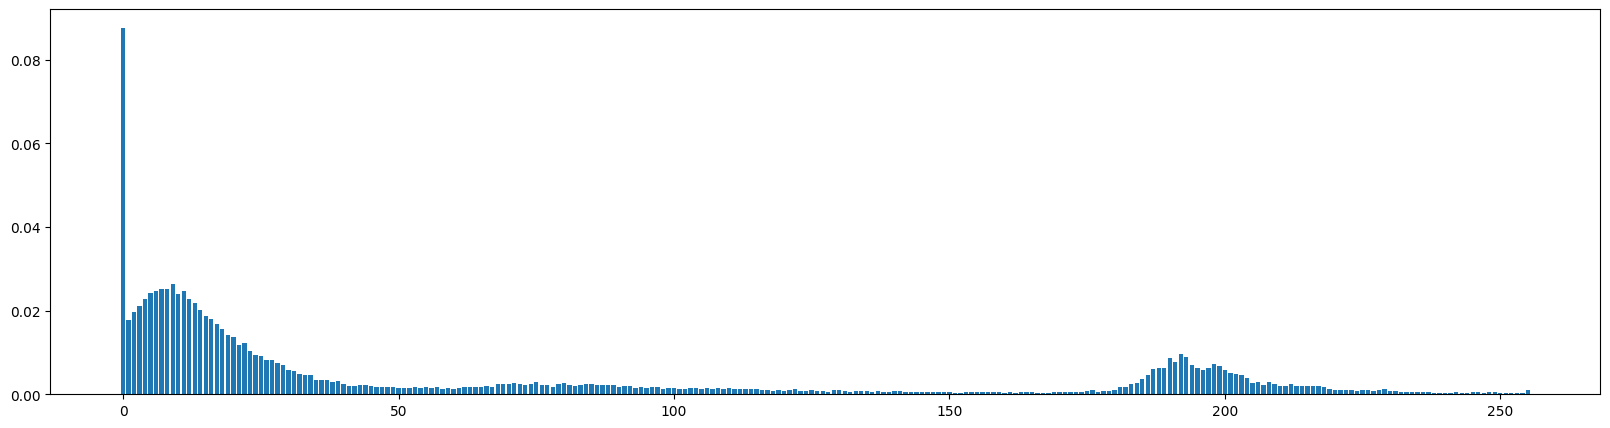

In [166]:
visualize_hist(hist_b)

In [167]:
assert((hist_gray == hist_cv).all())

## Вопрос 3

 Что можно сказать об изображении по его гистограмме?

**Ответ:** цвета, из которых в основном состоит картинка. Это можно использовать для базовой классификации, например море/лес

## Вопрос 4

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени?

**Ответ:** внутри сцен незначительно, при смене сцены - существенно.

## Упражнение 4: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Используйте черно-белое изображение `img_gray`. Визуализируйте степени сжатия 90, 60, 30, 5.

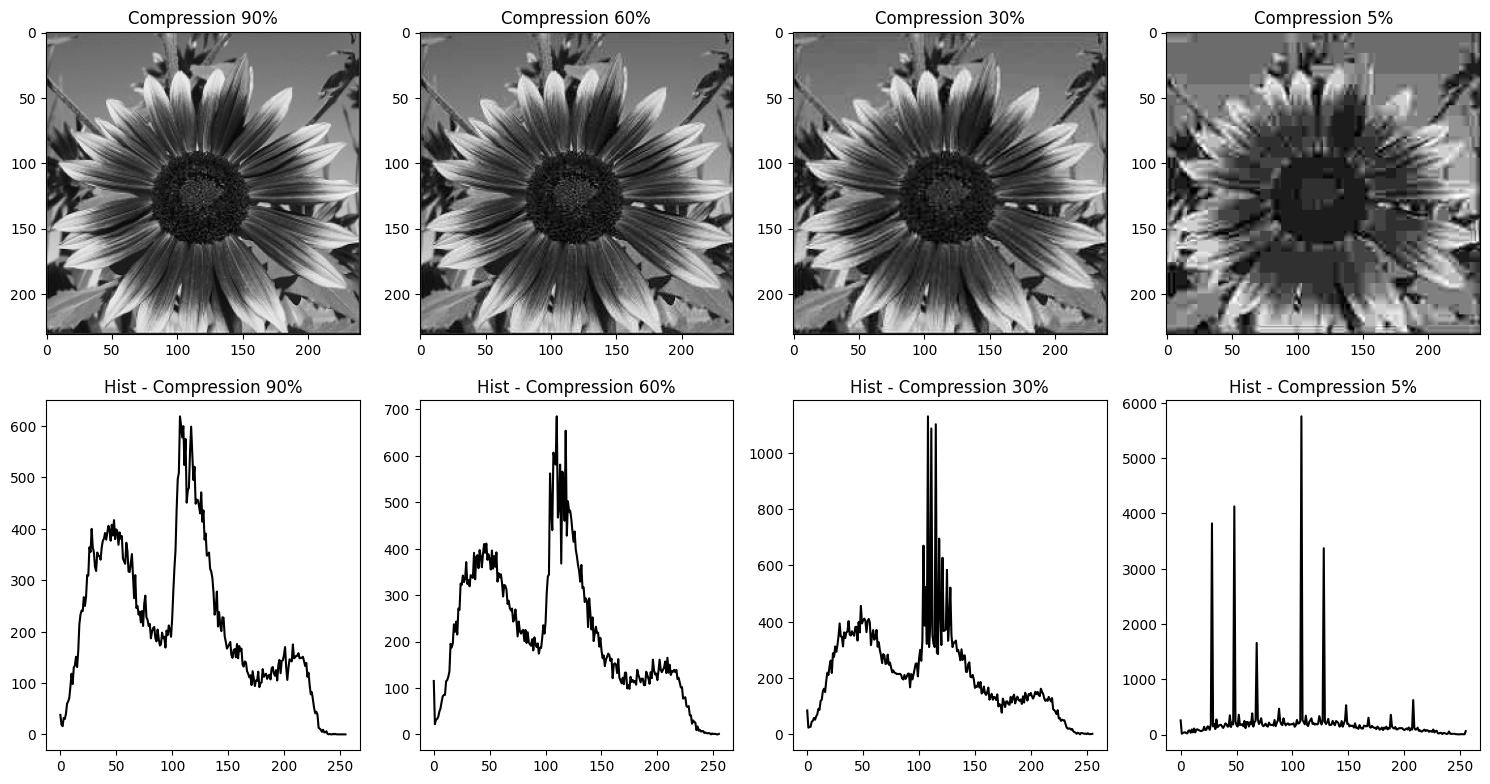

In [168]:
import cv2
import matplotlib.pyplot as plt

# Степени сжатия для исследования
compression_ratios = [90, 60, 30, 5]

# Визуализация гистограмм для разных степеней сжатия
plt.figure(figsize=(15, 8))

for i, compression_ratio in enumerate(compression_ratios, 1):
    # Сохранение изображения с заданным уровнем сжатия
    _, encoded_img = cv2.imencode('.jpg', img_gray, [int(cv2.IMWRITE_JPEG_QUALITY), compression_ratio])
    decoded_img = cv2.imdecode(encoded_img, cv2.IMREAD_GRAYSCALE)

    # Расчет гистограммы
    hist = cv2.calcHist([decoded_img], [0], None, [256], [0, 256])

    # Визуализация гистограммы
    plt.subplot(2, 4, i), plt.imshow(decoded_img, cmap='gray'), plt.title(f'Compression {compression_ratio}%')
    plt.subplot(2, 4, i+4), plt.plot(hist, color='black'), plt.title(f'Hist - Compression {compression_ratio}%')

plt.tight_layout()
plt.show()

## Упражнение 5: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

Подсказка: вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

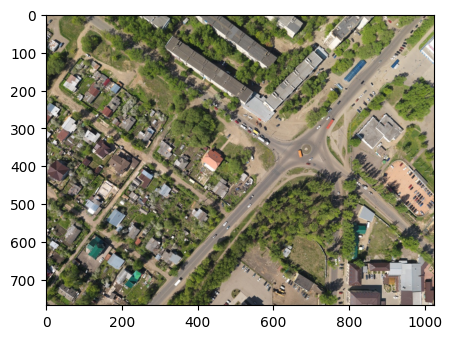

In [169]:
aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)

plt.figure(figsize=[5, 5])
plt.imshow(aerial_image)

In [170]:
# Преобразование в цветовое пространство HSV
hsv_image = cv2.cvtColor(aerial_image, cv2.COLOR_BGR2HSV)

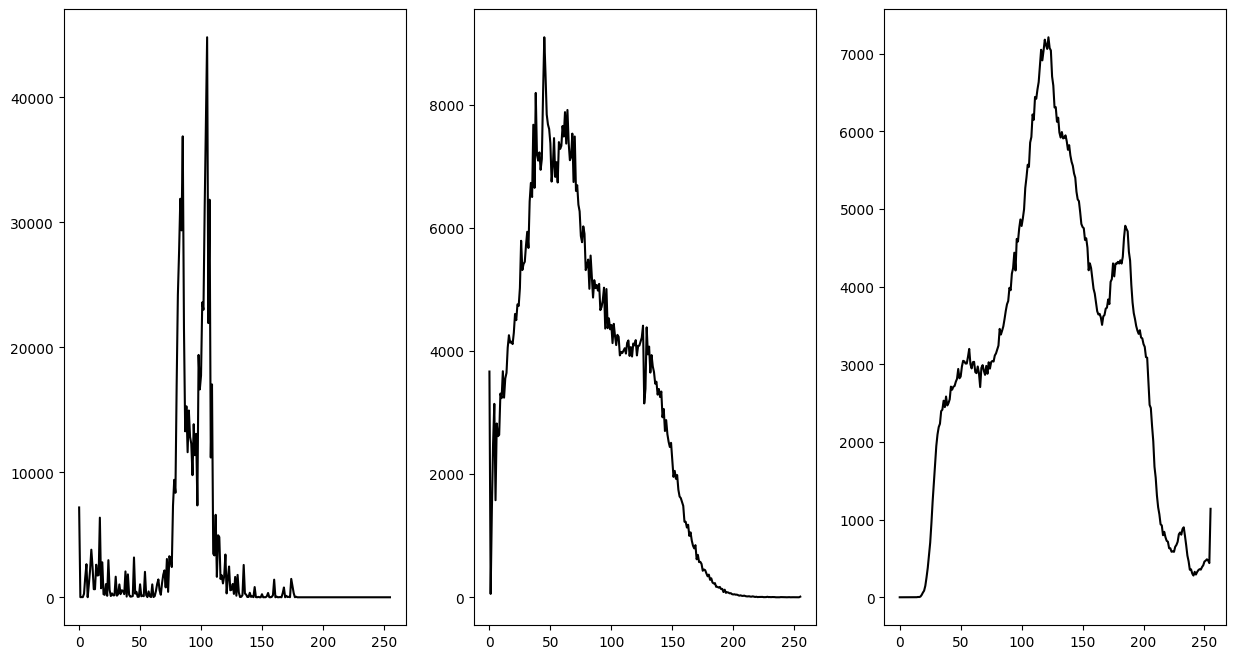

In [171]:
hist0 = cv2.calcHist([hsv_image[:,:,0]], [0], None, [256], [0, 256])
hist1 = cv2.calcHist([hsv_image[:,:,1]], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([hsv_image[:,:,2]], [0], None, [256], [0, 256])
plt.figure(figsize=(15, 8))
plt.subplot(1,3,1), plt.plot(hist0, color='black')
plt.subplot(1,3,2), plt.plot(hist1, color='black')
plt.subplot(1,3,3), plt.plot(hist2, color='black')
plt.show()

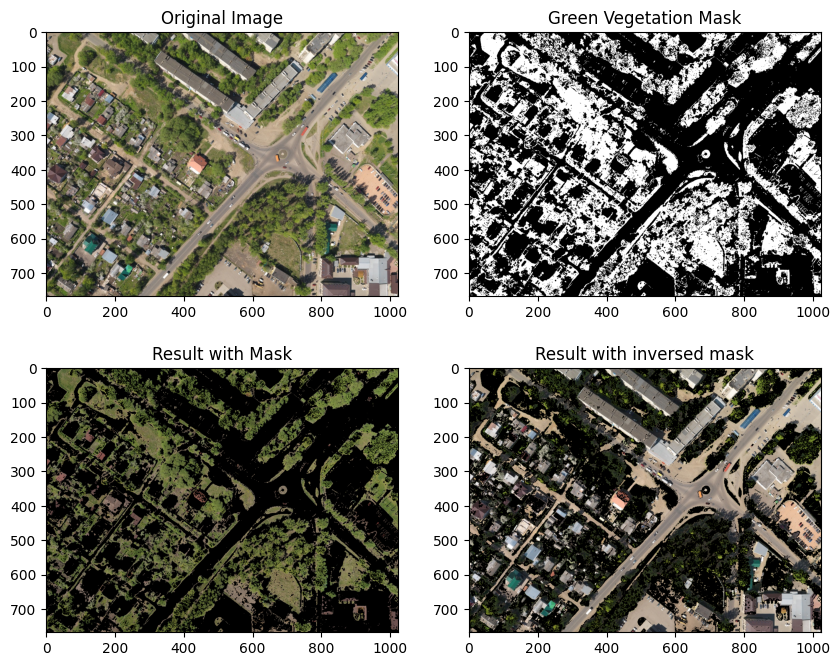

In [172]:

# Определение диапазона оттенков, соответствующих зеленым насаждениям
lower_green = np.array([50, 50, 75])
upper_green = np.array([120, 155, 155])

# Создание бинарной маски для зеленых насаждений
mask = cv2.inRange(hsv_image, lower_green, upper_green)
inversed_mask = cv2.bitwise_not(mask)
# Наложение маски на изображение
result = cv2.bitwise_and(aerial_image, aerial_image, mask=mask)
inversed_result = cv2.bitwise_and(aerial_image, aerial_image, mask=inversed_mask)
# Визуализация оригинального изображения, бинарной маски и результата
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1), plt.imshow(aerial_image), plt.title('Original Image')
plt.subplot(2,2,2), plt.imshow(mask, cmap='gray'), plt.title('Green Vegetation Mask')
plt.subplot(2,2,3), plt.imshow(result), plt.title('Result with Mask')
plt.subplot(2,2,4), plt.imshow(inversed_result), plt.title('Result with inversed mask')

plt.show()

In [173]:
aerial_image.size

2359296

In [174]:
mask.size

786432

In [175]:
mask[mask>0].size

300849

In [176]:
print("Процент зелени:",mask[mask>0].size/mask.size*100)

Процент зелени: 38.25492858886719


# Упражнение 6: Интегральное изображение
Напомним, что интегральным изображением называется следующая функция:
$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$
С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [177]:
class IntegralImage:

    def __init__(self, img):
        assert len(img.shape) == 2  # только для серых изображений

        self.img = img
        self.integral_img = self._compute_integral_image()

    def _compute_integral_image(self):
        rows, cols = self.img.shape
        integral_image = np.zeros((rows, cols), dtype=np.int32)

        for i in range(rows):
            for j in range(cols):
                integral_image[i, j] = self.img[i, j]

                if i > 0:
                    integral_image[i, j] += integral_image[i - 1, j]

                if j > 0:
                    integral_image[i, j] += integral_image[i, j - 1]

                if i > 0 and j > 0:
                    integral_image[i, j] -= integral_image[i - 1, j - 1]

        return integral_image

    def sum(self, x, y, w, h):
        x1, y1 = x - 1, y - 1
        x2, y2 = x + w - 1, y + h - 1

        A = self.integral_img[x1, y1] if x1 >= 0 and y1 >= 0 else 0
        B = self.integral_img[x1, y2] if x1 >= 0 else 0
        C = self.integral_img[x2, y1] if y1 >= 0 else 0
        D = self.integral_img[x2, y2]

        return D - B - C + A


In [178]:
I = IntegralImage(img_gray)

In [179]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 5

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:** т.к. операция в целом родственна свертке, то можно использовать ее для извлечения каких-то признаков, сравнений картинок по среднему значению в области и т.д

## Вопрос 6

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:** динамическое программирование